In [2]:
# including dependencies
# pandas used to create dataframe in much reliable way
#for sklearn we need to split our data for training and testing
#specifiing model like linear regression or lasso regression
# metrics model will evaluate error score accuracy etc

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
# data collection and processsing
# Load csv file and analyze

#load csv file using pandas 

car_dataset = pd.read_csv('./car data.csv')

In [4]:
#let's check the first five/six rows from the csv file for the test purpose 
# head() method used for first five rows

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#how many total rows and columns in the entire dataset
car_dataset.shape

(301, 9)

In [6]:
# what we will do in this case we will use some features like selling_price
# kms_driven , fuel_type and some other faeature to train our machine learning model so that
# whenever we give new data to the machine it can predict how much price the
# car can be sold

In [7]:
# getting some information abou the dataset
# check if their any missing value

car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#check how many cars are fuel_type as petrol or diesel or CNG and categorixe them
# check also the seller_type of dealer and individual
# also check for the transmission_type like manual or automatic

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
# Now we need to encode our data which's important because machine needs 0 or 1 not text data
# so we'll process let's say petrol- 0 | Diesel - 1 | CNG - 2 
# as well as well use Dealer - 0 | Individual - 1

# all we need categorize data

# for Fuel_Type
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2 }},inplace=True)

#for Seller_Type
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#for transmission
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [10]:
#let's check for the result for first five dataset

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [11]:
# spliting our original data into training data and test data

# Remember selling_price is our only target and other feature's are data


# let's drop the Car_Name which is not so important in prediction 
# and also drop Selling_Price into seperate variable

x = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = car_dataset['Selling_Price']


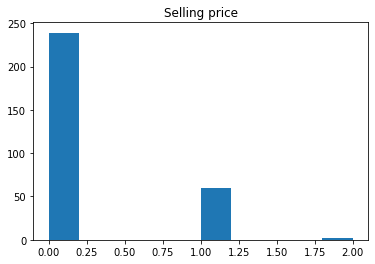

In [12]:
z = car_dataset['Fuel_Type']
plt.hist(z)
plt.title("Selling price")
plt.show()

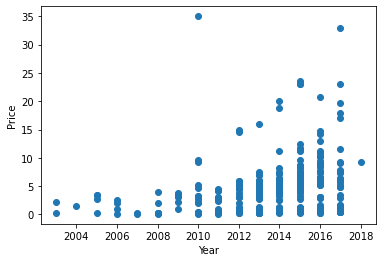

In [17]:
milege = car_dataset['Kms_Driven']
price = car_dataset['Selling_Price']
year = car_dataset['Year']

plt.scatter(year,price)
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [15]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
# we need to analyze this target price later
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [17]:
# Spliting Training and Testing
# we are specifing that 90% of our data is training and 10% is testing

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [18]:
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,0,0,0,0
249,2016,7.600,17000,0,0,0,0
277,2015,13.600,21780,0,0,0,0
194,2008,0.787,50000,0,1,0,0
244,2013,9.400,49000,1,0,0,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,0,0,0,0
22,2011,8.010,50000,0,0,1,0
72,2013,18.610,56001,0,0,0,0
15,2016,10.790,43000,1,0,0,0


In [19]:
Y_train

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64

In [20]:
# loading the linear regression model
# linear regression performs on those case which's are directly co-related 
# In this case the value we want to predict is dependent variable
# a straight line or surface that minimizes difference between actual vs 
# predicted value

lin_reg_model = LinearRegression()

In [21]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [22]:
# Let's evaulate our model on training  data
# let's predict on the training data

training_data_predict = lin_reg_model.predict(X_train)

In [23]:
# find out the squared error which might be useful in regression problem

error_score = metrics.r2_score(Y_train,training_data_predict)

In [24]:
# R_squared value is not a definite value or it depends on each problem
# we are solving it depends on the what particular magnitute we have
# not like classification where we can get the result through accuracy

print("R squard error ",error_score)

R squard error  0.8799451660493698


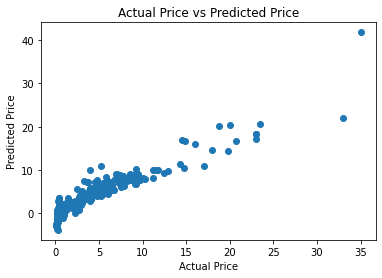

In [25]:
# Another way to demostrate the visuality through matplotlib 
# to see the result of predected value vs actual value
# let's see how close the values are

plt.scatter(Y_train,training_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [26]:
# as we can see the acutal price and the predicted price are so
# close to each other which is quite efficient in this case
# Yes there are some values greater then 10 that's why when the actual price
# increases there we can see some gap

In [27]:
# Now we will predict on testing data

test_data_predict = lin_reg_model.predict(X_test)

In [28]:
test_error_score = metrics.r2_score(Y_test,test_data_predict)
print("R square error : ",test_error_score)

R square error :  0.8365766715026905


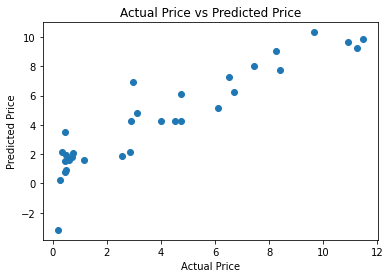

In [29]:
plt.scatter(Y_test,test_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [30]:
# as we are concerning 10% of testing data from total dataset we can see
# not much difference between the distance from X-axis t0 Y-axis
# But some case more value of training and testing data set can give us
# better output or prediction


In [31]:
# let's use lesso regression model

leso_data_reg = Lasso()

In [32]:
leso_data_reg.fit(X_train,Y_train)

Lasso()

In [33]:
# let's predit for training data
leso_train_data = leso_data_reg.predict(X_train)

In [34]:
err_score = metrics.r2_score(Y_train,leso_train_data)

In [35]:
print("R squard error ",err_score)

R squard error  0.8427856123435794


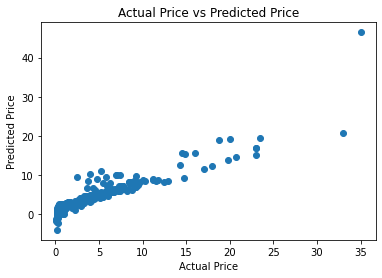

In [36]:
plt.scatter(Y_train,leso_train_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [37]:
# let's predit for testing data
leso_test_data = leso_data_reg.predict(X_test)

In [38]:
errr_score = metrics.r2_score(Y_test,leso_test_data)
print("R squard error ",errr_score)

R squard error  0.8709167941173195


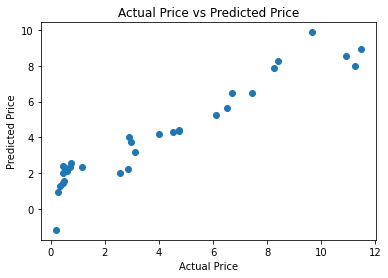

In [39]:
plt.scatter(Y_test,leso_test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [40]:
# Result : the distance between two point is not so higher 
# We have used linear regression model to see the plot 
# But for multiple feature we use lasso most of the time
# In both case our model fits quite perfect way though our dataset is not big


In [47]:
# let's use random forest model
rand_reg_data = RandomForestRegressor(n_estimators=100)

In [48]:
rand_reg_data.fit(X_train,Y_train)

RandomForestRegressor()

In [49]:
#let's predict for train data
rand_train_data = rand_reg_data.predict(X_train)

In [50]:
rand_err_score = metrics.r2_score(Y_train,rand_train_data)

In [51]:
print("R squard error : ",rand_err_score)

R squard error :  0.9866432605192363


In [52]:
#let's predict for test data
rand_test_data = rand_reg_data.predict(X_test)

In [53]:
rand_err_score = metrics.r2_score(Y_test,rand_test_data)


In [54]:
print("R square error : ",rand_err_score)

R square error :  0.9806918330991481


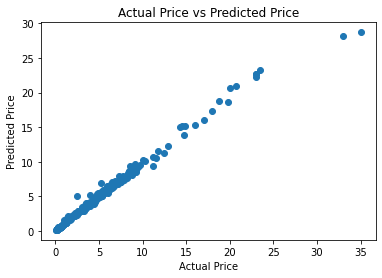

In [55]:
#let's see the plot for training data with random forest model

plt.scatter(Y_train,rand_train_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

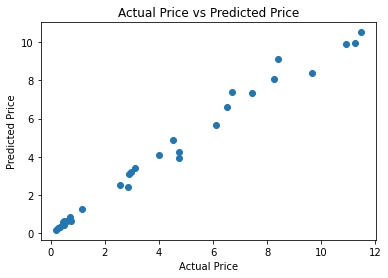

In [56]:
#let's see the plot for test data with random forest model

plt.scatter(Y_test,rand_test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [57]:
# In conclusion we can see this is how we can use multiple model to
# predict particular value and compare how will the model is performing
# And this is how we can get the price of  used cars using the particular
# dataset in linear or lesso regression or Random forest model